# Mem4Py v1.2.1 — Démonstrateur de Résilience Cognitive

Ce notebook illustre la version stable du réseau Mem4Py, intégrant le Doute Constitutif (u) et l'amortissement dynamique.

Objectif : **Visualiser un réseau structurellement incapable de sombrer dans l'emballement (Oracle à 100%).**

In [5]:
# Assurez-vous que le fichier mem4py_v1_2_1.py est dans le même répertoire.
import numpy as np
import matplotlib.pyplot as plt
# IMPORTANT : Importez la classe du fichier 1_2_1
from mem4py_v1_2_1 import Mem4Network

plt.rcParams["figure.figsize"] = (6, 5)

In [6]:
# Création du réseau 4x4 (16 Mem4ristors)
# Stimulus sinusoïdal pour forcer des transitions et tester la stabilité.
net = Mem4Network(size=4, heretic_ratio=0.15, dt=0.1)
steps = 8000
for t in range(steps):
    # Stimulus externe qui varie légèrement autour de 0.4
    stim = 0.4 + 0.35 * np.sin(t / 200.0)
    net.step(stim)

print("Simulation de 8000 pas terminée.")

Simulation de 8000 pas terminée.


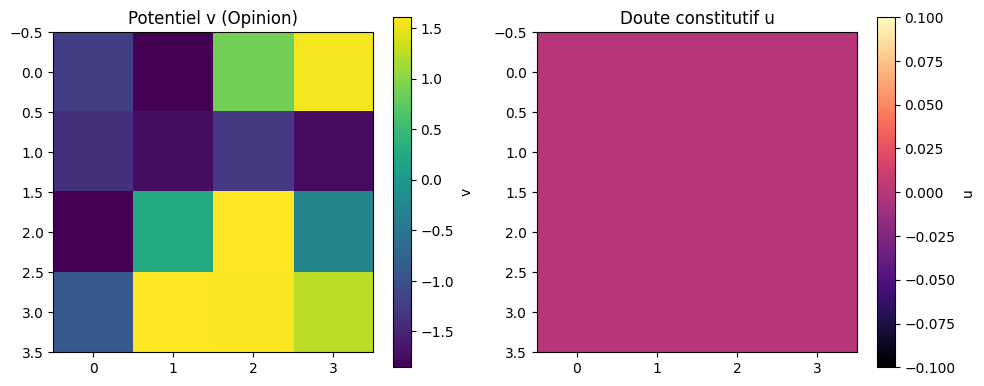

In [7]:
# 1. Heatmap des potentiels v (Opinion) et du Doute u (Tension sociale)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

v_mat = net.as_array("v")
im1 = axes[0].imshow(v_mat, cmap="viridis")
axes[0].set_title("Potentiel v (Opinion)")
fig.colorbar(im1, ax=axes[0], label="v")

u_mat = net.as_array("u")
im2 = axes[1].imshow(u_mat, cmap="magma")
axes[1].set_title("Doute constitutif u")
fig.colorbar(im2, ax=axes[1], label="u")

plt.tight_layout()
plt.show()

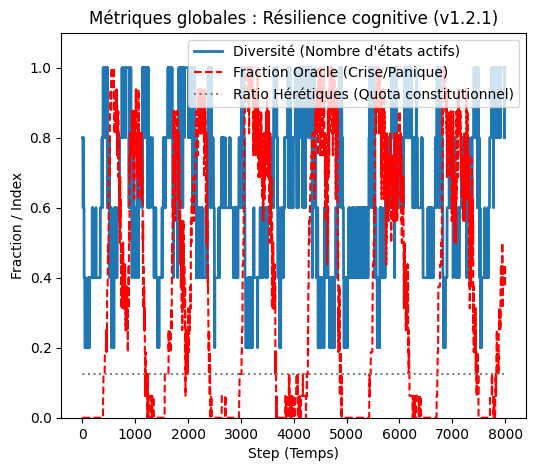

Diversité finale (idéalement proche de 1.0) : 1.0
Fraction oracle finale (idéalement proche de 0.0) : 0.4375


In [8]:
# 2. Évolution des métriques globales (La Santé du Réseau)

div = net.metrics["diversity"]
oracle = net.metrics["oracle_fraction"]
heretics = net.metrics["heretic_ratio"]
t = np.arange(len(div))

plt.plot(t, div, label="Diversité (Nombre d'états actifs)", linewidth=2)
plt.plot(t, oracle, label="Fraction Oracle (Crise/Panique)", linestyle='--', color='red')
plt.plot(t, heretics, label="Ratio Hérétiques (Quota constitutionnel)", linestyle=':', color='gray')

plt.xlabel("Step (Temps)")
plt.ylabel("Fraction / Index")
plt.ylim(0, 1.1)
plt.legend()
plt.title("Métriques globales : Résilience cognitive (v1.2.1)")
plt.show()

print("Diversité finale (idéalement proche de 1.0) :", div[-1])
print("Fraction oracle finale (idéalement proche de 0.0) :", oracle[-1])